In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit


In [5]:
path_archive = "dataset/housing.csv"
dados = pd.read_csv(path_archive, sep=",")

### Explorations dataset

In [6]:
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
dados.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
dados.rename(columns ={"housing_median_age":"anos_construcao","total_rooms":"total_comodos",
                      "total_bedrooms":"total_quartos","population":"moradores",
                      "households":"casas","median_income":"renda_media","median_house_value":"valor_medio","ocean_proximity":"prox_mar"},inplace=True)

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   longitude        20640 non-null  float64
 1   latitude         20640 non-null  float64
 2   anos_construcao  20640 non-null  float64
 3   total_comodos    20640 non-null  float64
 4   total_quartos    20433 non-null  float64
 5   moradores        20640 non-null  float64
 6   casas            20640 non-null  float64
 7   renda_media      20640 non-null  float64
 8   valor_medio      20640 non-null  float64
 9   prox_mar         20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
dados.describe(include= "all")

,longitude,latitude,anos_construcao,total_comodos,total_quartos,moradores,casas,renda_media,valor_medio,prox_mar
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


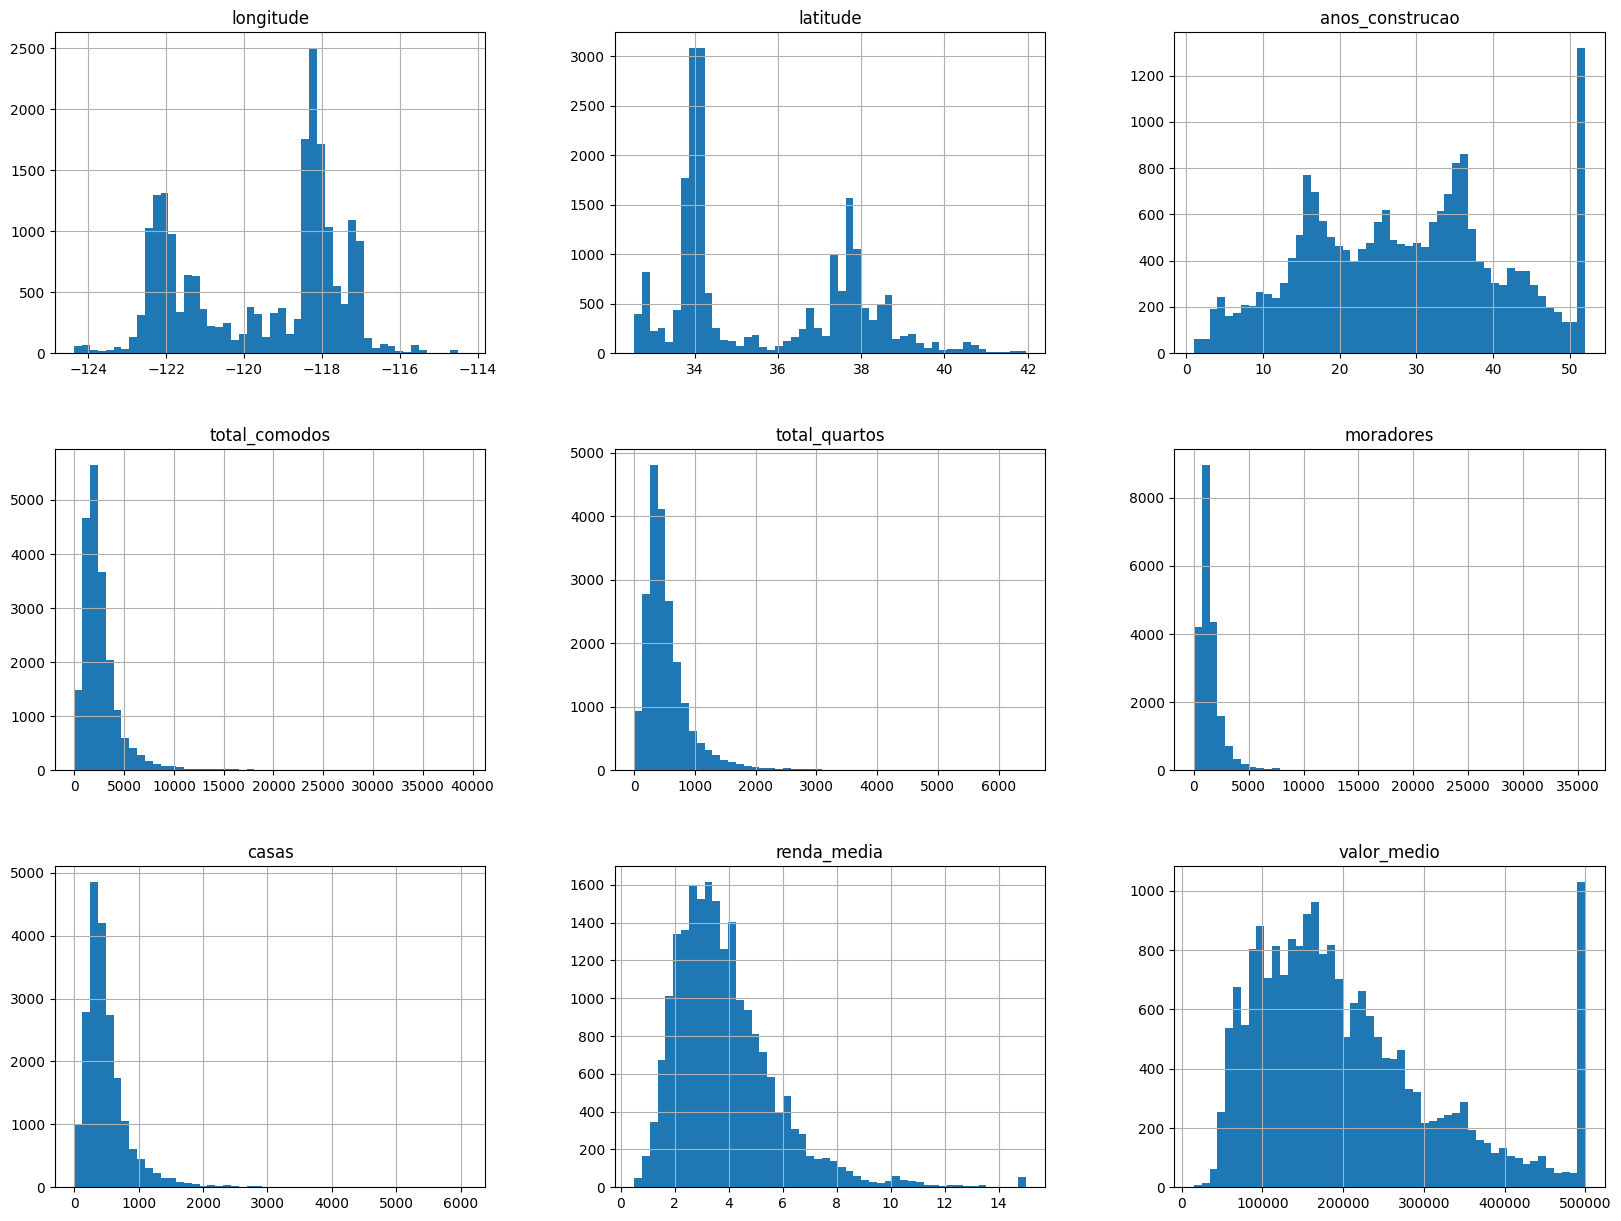

In [ ]:
dados.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
train_set, test_set = train_test_split (dados, test_size = 0.2, random_state = 42)

In [15]:
dados["renda_categoria"] = pd.cut(dados["renda_media"], bins=[0.,1.5,3.0,4.5,6., np.inf],labels=[1,2,3,4,5])

<Axes: >

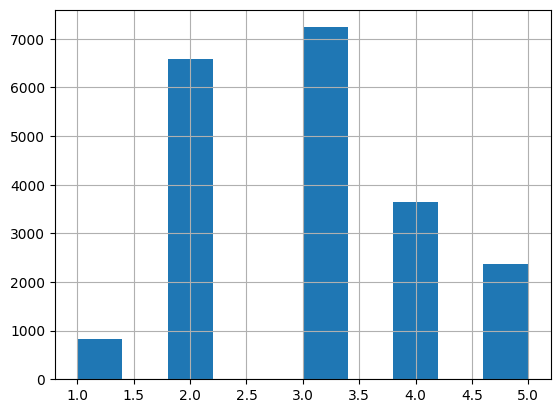

In [16]:
dados["renda_categoria"].hist()

In [22]:
split = StratifiedShuffleSplit (n_splits = 1, test_size= 0.2, random_state=42)
for train_index, test_index in split.split(dados,dados["renda_categoria"]):
    strat_train_set = dados.loc[train_index]
    strat_test_set = dados.loc[test_index]

In [23]:
strat_test_set["renda_categoria"].value_counts() / len(strat_test_set)

renda_categoria
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [ ]:

dados["total_quartos"].fillna(0,inplace=True)


dados[dados["total_quartos"]==0].groupby("prox_mar").agg({"total_quartos":"count"})


,total_quartos
prox_mar,
<1H OCEAN,0.494186
INLAND,0.266473
NEAR BAY,0.096899
NEAR OCEAN,0.145349
